In [237]:
from IPython.display import Video

import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from tqdm import tqdm

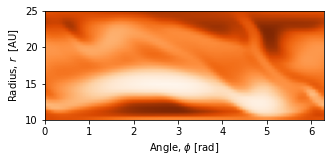

In [347]:
run_name =  'mmr_0000'
n = 5000

data_filenames=[]
for i in range(0,n+1,10):
    data_filenames.append('/Users/jsn/landing/data/good_data_mmr/1_2_resonance/gasdens{}.dat'.format(i))

extent = [
      0,
      2*np.pi,10,
      25]
    
fig,ax = plt.subplots(figsize=(5,2))
rho = np.fromfile(data_filenames[300]).reshape(32,32*3)
im = ax.imshow(np.log10(rho),origin='lower',cmap=cm.Oranges_r, extent=extent, aspect='auto')
ax.set_xlabel('Angle, $\phi$ [rad]')
ax.set_ylabel('Radius, $r$  [AU]')
#fig.colorbar(im)

plt.savefig('1_2_resonance_runaway_density.pdf', bbox_inches='tight')

plt.show()

In [332]:
n_planets=5
planets = []
for i in range(n_planets):
    orbit_filename = '/Users/jsn/landing/data/good_data_mmr/{}/orbit{}.dat'.format('1_2_4_8_resonance',i)

    planet = {}
    keys = ['time', 'e', 'a', 'mean_anomaly', 'true_anomaly', 'arg_periastron', 'phi', 'i', 'lon_asc_node', 'pa_perhelion']
    for key in keys:
        planet[key] = []
    with open(orbit_filename, 'r') as f:
        for line in f:
            vals = [float(l) for l in line.split()]
            planet['time'].append(vals[0]/(2*np.pi))
            planet['e'].append(vals[1])
            planet['a'].append(vals[2])
            planet['mean_anomaly'].append(vals[3])
            planet['true_anomaly'].append(vals[4])
            planet['arg_periastron'].append(vals[5])
            planet['phi'].append(vals[6])
            planet['i'].append(vals[7])
            planet['lon_asc_node'].append(vals[8])
            planet['pa_perhelion'].append(vals[9])

    planets.append(planet)
        

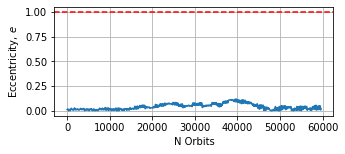

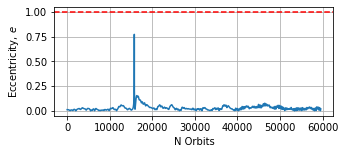

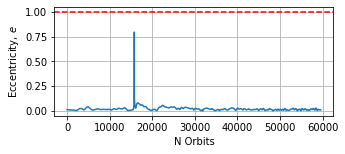

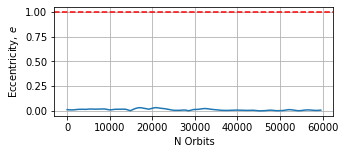

In [336]:
for i in range(1,n_planets):
    fig, ax = plt.subplots(figsize=(5,2))

    ax.plot(planets[i]['time'], planets[i]['e'], linestyle='-')
    ax.axhline(1, color='red', linestyle='--')
    ax.set_xlabel('N Orbits')
    ax.set_ylabel('Eccentricity, $e$')
    ax.grid()
    
    plt.savefig('1_2_4_8_planet_{}_ecc.pdf'.format(i), bbox_inches='tight')
    plt.show()


In [330]:
n_planets=4
planets = []
for i in range(n_planets):
    orbit_filename = '/Users/jsn/landing/data/good_data_mmr/{}/orbit{}.dat'.format('1_2_4_resonance',i)

    planet = {}
    keys = ['time', 'e', 'a', 'mean_anomaly', 'true_anomaly', 'arg_periastron', 'phi', 'i', 'lon_asc_node', 'pa_perhelion']
    for key in keys:
        planet[key] = []
    with open(orbit_filename, 'r') as f:
        for line in f:
            vals = [float(l) for l in line.split()]
            planet['time'].append(vals[0]/(2*np.pi))
            planet['e'].append(vals[1])
            planet['a'].append(vals[2])
            planet['mean_anomaly'].append(vals[3])
            planet['true_anomaly'].append(vals[4])
            planet['arg_periastron'].append(vals[5])
            planet['phi'].append(vals[6])
            planet['i'].append(vals[7])
            planet['lon_asc_node'].append(vals[8])
            planet['pa_perhelion'].append(vals[9])

    planets.append(planet)
        

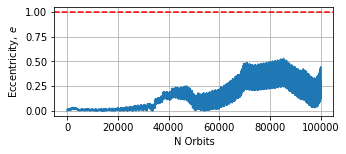

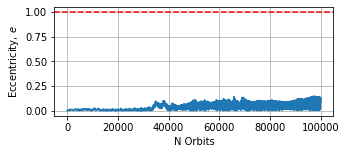

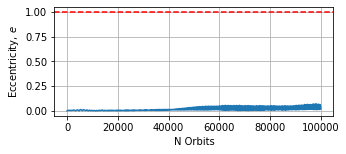

In [323]:
for i in range(1,n_planets):
    fig, ax = plt.subplots(figsize=(5,2))

    ax.plot(planets[i]['time'], planets[i]['e'], linestyle='-')
    ax.axhline(1, color='red', linestyle='--')
    ax.set_xlabel('N Orbits')
    ax.set_ylabel('Eccentricity, $e$')
    ax.grid()
    
plt.savefig('1_2_4_planet_{}_ecc.pdf'.format(i), bbox_inches='tight')
plt.show()


In [324]:
n_planets = 3
planets = []
for i in range(3):
    orbit_filename = '/Users/jsn/landing/data/good_data_mmr/{}/orbit{}.dat'.format('1_2_resonance',i)

    planet = {}
    keys = ['time', 'e', 'a', 'mean_anomaly', 'true_anomaly', 'arg_periastron', 'phi', 'i', 'lon_asc_node', 'pa_perhelion']
    for key in keys:
        planet[key] = []
    with open(orbit_filename, 'r') as f:
        for line in f:
            vals = [float(l) for l in line.split()]
            if vals[0]/(2*np.pi) > 32750:
                break
            planet['time'].append(vals[0]/(2*np.pi))
            planet['e'].append(vals[1])
            planet['a'].append(vals[2])
            planet['mean_anomaly'].append(vals[3])
            planet['true_anomaly'].append(vals[4])
            planet['arg_periastron'].append(vals[5])
            planet['phi'].append(vals[6])
            planet['i'].append(vals[7])
            planet['lon_asc_node'].append(vals[8])
            planet['pa_perhelion'].append(vals[9])

    planets.append(planet)
        

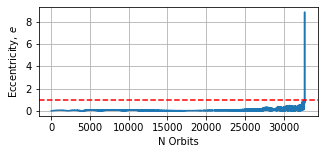

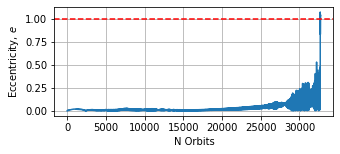

In [325]:
for i in range(1,3):
    fig, ax = plt.subplots(figsize=(5,2))

    ax.plot(planets[i]['time'], planets[i]['e'], linestyle='-')
    ax.axhline(1, color='red', linestyle='--')
    ax.set_xlabel('N Orbits')
    ax.set_ylabel('Eccentricity, $e$')
    ax.grid()
    
    plt.savefig('1_2_planet_{}_ecc.pdf'.format(i), bbox_inches='tight')

    plt.show()


100%|████████████████████████████████████████| 401/401 [00:01<00:00, 314.26it/s]


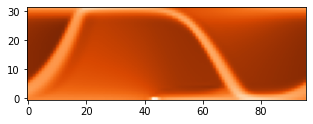

In [262]:
ims = []

fig,ax = plt.subplots(figsize=(5,5))

for df in tqdm(data_filenames):

    rho = np.fromfile(df).reshape(32,3*32)
    im = ax.imshow(np.log10(rho),origin='lower',cmap=cm.Oranges_r)
    #fig.colorbar(im)
    ims.append([im])

In [263]:
ani = animation.ArtistAnimation(fig, ims, interval=1000/30, blit=True, repeat_delay=500)
ani.save('{}.mp4'.format(run_name, writer=animation.FFMpegWriter(fps=30)))